# Analyising

## Loading 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Raw = pd.read_csv('housing.csv')
Raw.head()

In [ ]:
Raw.info()

In [ ]:
print(type(Raw['RAD']))
print(type(Raw['CHAS']))
Raw['RAD'].value_counts()
Raw['CHAS'].value_counts()

In [ ]:
# Getting all the stats info about the data
Raw.describe()

## Plotting the Graphs

In [27]:
# Raw.hist(figsize=(20,30), bins=20)

##### Dropping CHAS
We can note that it is not affecting the price much and even have the low co-relation so dropping this would be better

In [28]:
Raw.drop(columns='CHAS', inplace=True)
Raw.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


<Axes: >

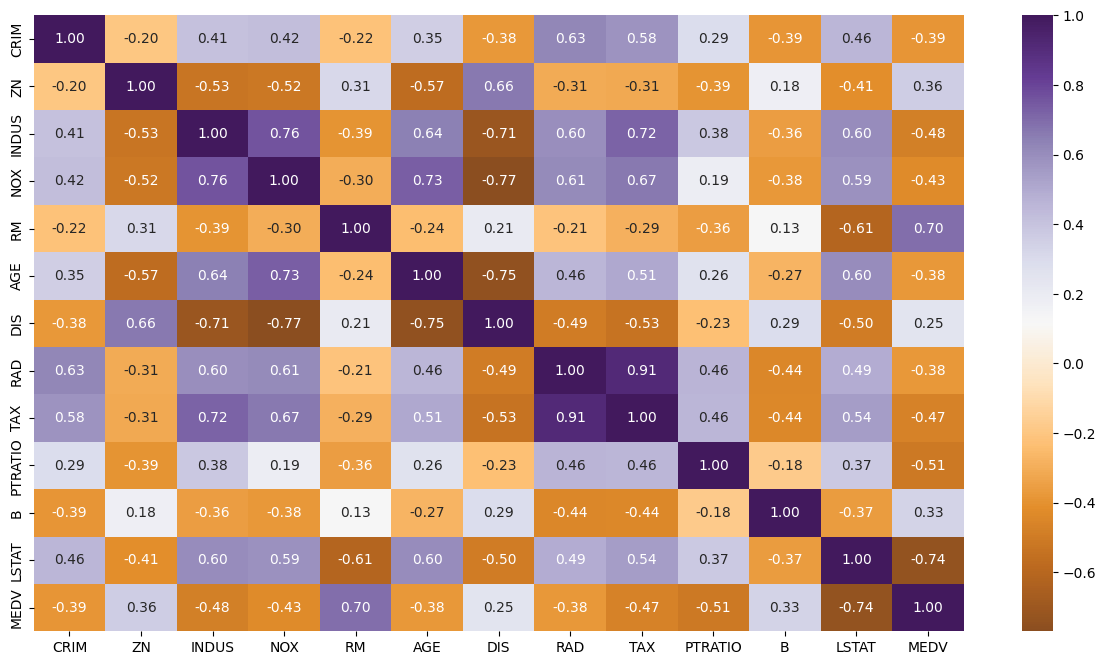

In [29]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(Raw.corr(), cmap= 'PuOr', annot= True, fmt='.2f', alpha=.9)
# plt.show()

## Splitting the Data
And checking the split according to CHAS 

Selectes CHAS as this is a ceegrocial feature and should be distributed evenly

In [30]:
from sklearn.model_selection import train_test_split

Train1, Test1 = train_test_split(Raw, test_size=.2, random_state=np.random.randint(len(Raw)))
print(Train1.shape, Test1.shape)

(404, 13) (102, 13)


Checking the split of the CHAS value by counting <br>

This wont work as the CHAS has been dropped would work befrore dropping

In [31]:
# print("CHAS column in Train", Train1['CHAS'].value_counts())    
# print("CHAS column in Test",Test1['CHAS'].value_counts())

#### Stratified Sampling
This is used to sample the data as per some strategy.<br>
Below is a example of Using condition on CHAS for even ditribution.

In [32]:
# This section I am copying and would be a comment only. I don't do this kind of sampling

# from sklearn.model_selection  import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1 , test_size= .2, random_state= 423)
# for trian_idx, test_idx in split.split(Raw, Raw['CHAS']): # CHAS -> any int type
#     st_train = Raw.loc[trian_idx]
#     st_test = Raw.loc[test_idx]

# st_train.info()

## Finding Co-relation

In [33]:
Train1.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.208084,0.417881,0.458215,-0.255767,0.368337,-0.391761,0.645985,0.598194,0.299996,-0.444366,0.494125,-0.409582
ZN,-0.208084,1.000000,-0.528721,-0.517180,0.303532,-0.568404,0.669391,-0.313765,-0.309514,-0.386198,0.178201,-0.405491,0.344985
INDUS,0.417881,-0.528721,1.000000,0.762441,-0.385098,0.654091,-0.713787,0.589682,0.718401,0.387132,-0.358117,0.607571,-0.476100
NOX,0.458215,-0.517180,0.762441,1.000000,-0.291167,0.729254,-0.767910,0.628711,0.677506,0.215397,-0.396037,0.589573,-0.421803
RM,-0.255767,0.303532,-0.385098,-0.291167,1.000000,-0.245828,0.188412,-0.190121,-0.276629,-0.378734,0.140891,-0.621319,0.718374
AGE,0.368337,-0.568404,0.654091,0.729254,-0.245828,1.000000,-0.749290,0.455087,0.503587,0.281812,-0.274992,0.618530,-0.371074
DIS,-0.391761,0.669391,-0.713787,-0.767910,0.188412,-0.749290,1.000000,-0.498844,-0.532836,-0.235864,0.300669,-0.498974,0.241996
RAD,0.645985,-0.313765,0.589682,0.628711,-0.190121,0.455087,-0.498844,1.000000,0.901717,0.464005,-0.441668,0.496753,-0.383069
TAX,0.598194,-0.309514,0.718401,0.677506,-0.276629,0.503587,-0.532836,0.901717,1.000000,0.459990,-0.438800,0.550053,-0.465308
PTRATIO,0.299996,-0.386198,0.387132,0.215397,-0.378734,0.281812,-0.235864,0.464005,0.459990,1.000000,-0.178492,0.400678,-0.526302


Co-relation only for the price column
and aranigng it in decending order

In [34]:
PrcCorr = Raw.corr().MEDV.sort_values(ascending= False)
PrcCorr

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

We can note a high co-relation with **RM, LSTAT** where as modrate co-relation with **PTRatio, INDUS, TAX, NOX**

This means there have very high importance in out dataset

#### Plotting the Relation between the attributes

In [37]:
from pandas.plotting import scatter_matrix
# We are selecting the attrib in which we want to see co-relation
Attib = ['MEDV', 'RM', 'LSTAT', 'DIS', 'AGE']
# scatter_matrix(Raw[Attib], figsize=(15,15))

### Missing Attib

The most imp method is filling it with the Mean / Median

#### Imputer
This is used to fill the missing data points in the data set. using some starategies like Mean/ Medain.

In [14]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')
# imputer.fit(Raw)

# imputer.statics_ -> For getting the stats for the imputer
# Here we are using median as the strategy to Fill the missing values